In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from utils import *

plt.rcParams["figure.figsize"] = (20,10)

In [2]:
# example
def f(x, y): 
    return np.sin(0.5 * x**2 - 0.25 * y**2 + 3)*np.cos(2*x+1-np.exp(y))

-3.5342231046900734
[21, 0]


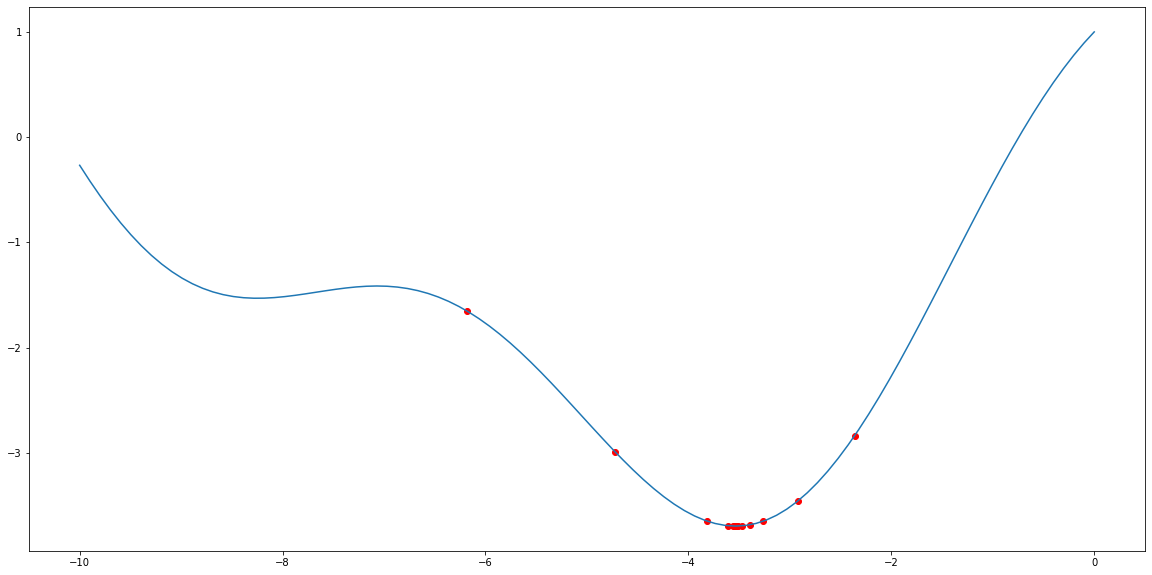

In [3]:
def g(x): 
    return np.cos(x)+3*np.sin(x/3)

x = np.linspace(-10, 0, 100)
y = g(x)

fig, ax = plt.subplots()
ax.plot(x, y)

counters = [0,0]
print(golden(g, -10, 0, 0.001, counters))
print(counters)
plt.scatter(points_check,g(np.array(points_check)), color="red")

plt.plot()
plt.show()

In [4]:
lr = 1
epoch = 15
x = [-0.1, -0.4]

counters = [0,0]
points = gradient_golden_sec(f, lr, epoch, x, 0.1, counters)

points

array([[-0.1       , -0.4       ],
       [-0.14982977, -0.22810753],
       [-0.31686347, -0.11042827],
       [-0.66780836, -0.02441204],
       [-0.68096823, -0.09453062],
       [-0.71135268, -0.15427624],
       [-0.7126012 , -0.21578724],
       [-0.75721754, -0.25455267],
       [-0.73721477, -0.28596179],
       [-0.77337138, -0.31132677],
       [-0.75690494, -0.33490548],
       [-0.78473003, -0.35466967],
       [-0.77162148, -0.3731005 ],
       [-0.79153415, -0.38591566],
       [-0.78235694, -0.40085534]])

In [5]:
counters

[84, 14]

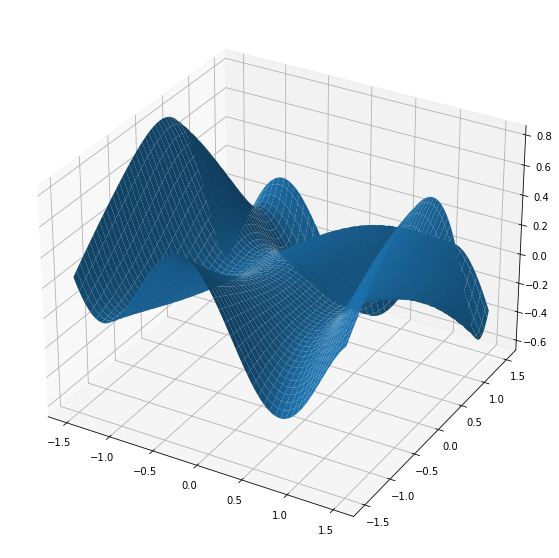

In [7]:
t = np.linspace(-1.5, 1.5, 100)
X, Y = np.meshgrid(t, t)
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(X, Y, f(X, Y))

-0.040909753039239875


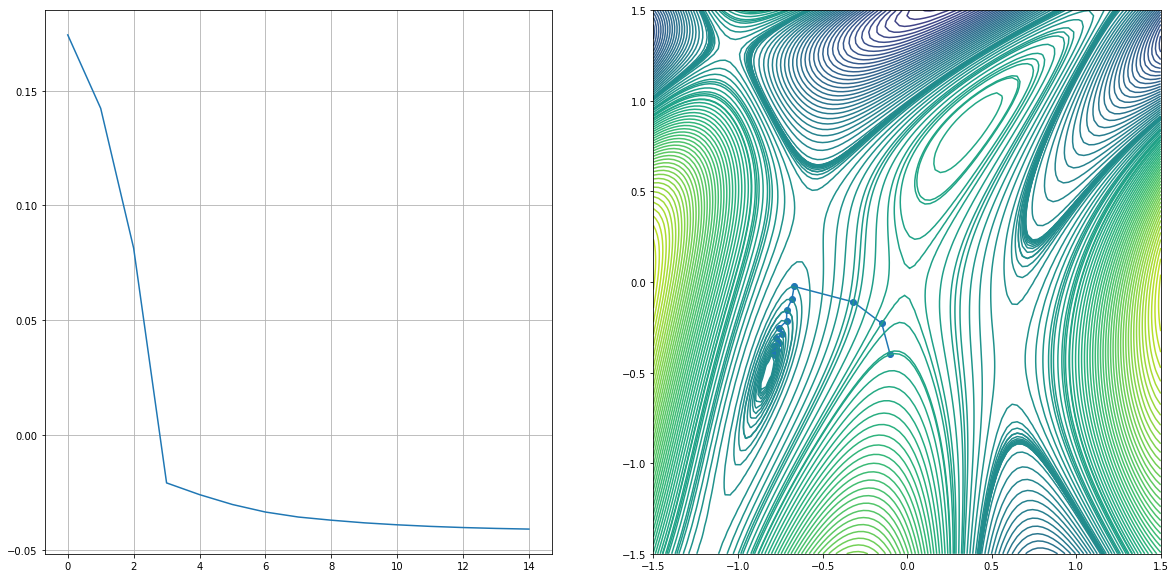

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(f(points[:, 0], points[:, 1]))
ax1.grid()
ax2.plot(points[:, 0], points[:, 1], 'o-')
ax2.contour(X, Y, f(X, Y), levels=sorted([f(p[0], p[1]) for p in points] + list(np.linspace(-1, 1, 100))))
print(f(points[-1, 0], points[-1, 1]))

In [12]:
def golden_method(f, tmin, tmax, lr0, epoch = 10, eps = 0.01, x = [0,0], counters = [0,0]):
    points = gradient_golden_sec(f, lr0, epoch, x, eps, counters)
    t = np.linspace(tmin, tmax, 100)
    X, Y = np.meshgrid(t, t)
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.plot(f(points[:, 0], points[:, 1]))
    ax1.grid()
    ax2.plot(points[:, 0], points[:, 1], 'o-')
    ax2.contour(X, Y, f(X, Y), levels=sorted(list(set([f(*p) for p in points] + list(np.linspace(-1, 1, 100))))))
    print(f(points[-1, 0], points[-1, 1]))   

-0.6553407616748818


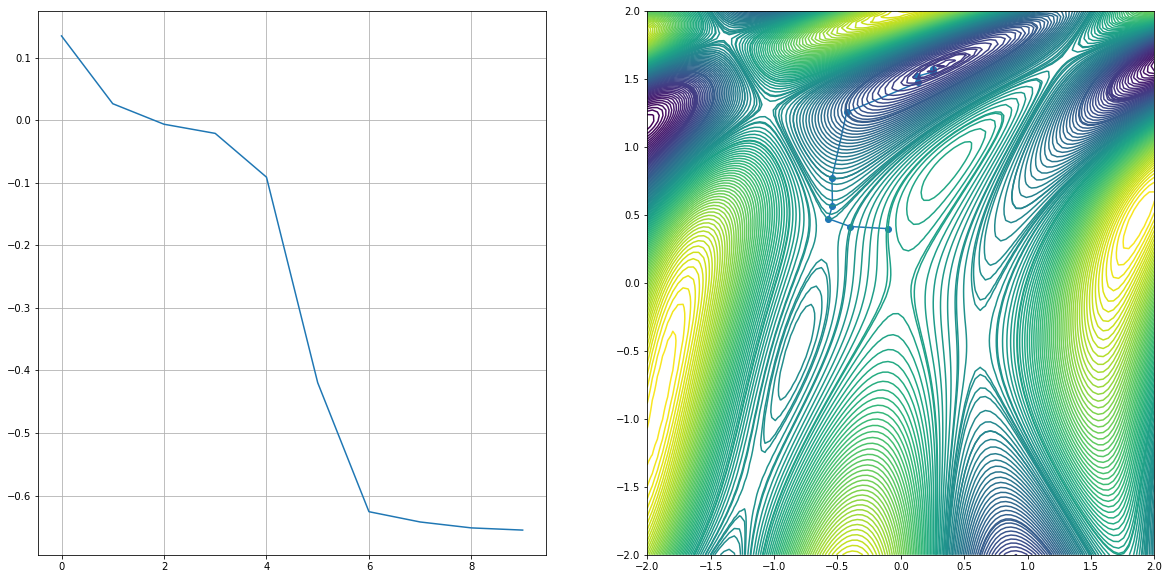

In [15]:
counters = [0,0]
golden_method(f, -2, 2, 1, x = [-0.1, 0.4], counters = counters)

In [16]:
counters

[99, 9]

-0.03840904668550988


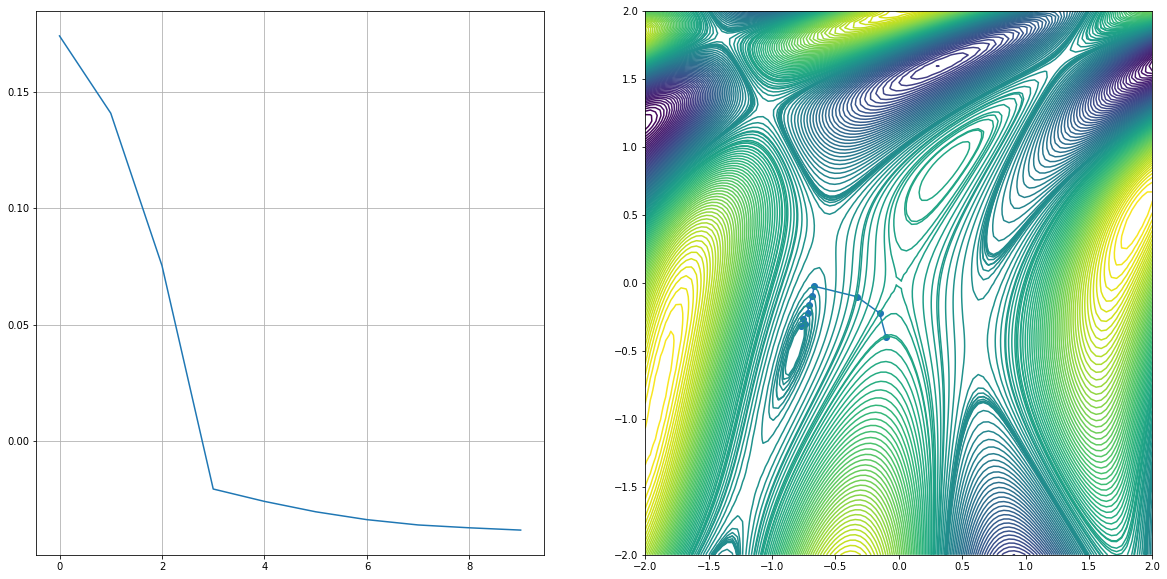

In [17]:
counters = [0,0]
golden_method(f, -2, 2, 1, x = [-0.1, -0.4], counters = counters)

In [18]:
counters

[99, 9]

0.1411200080598672


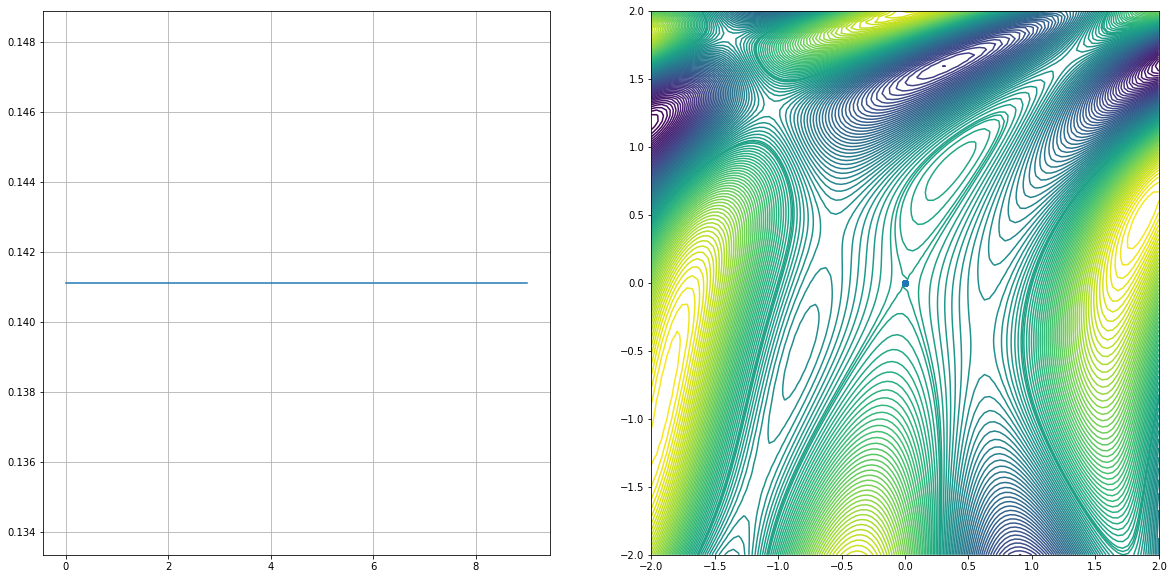

In [19]:
golden_method(f, -2, 2, 1, 10)

-0.037483661478480854


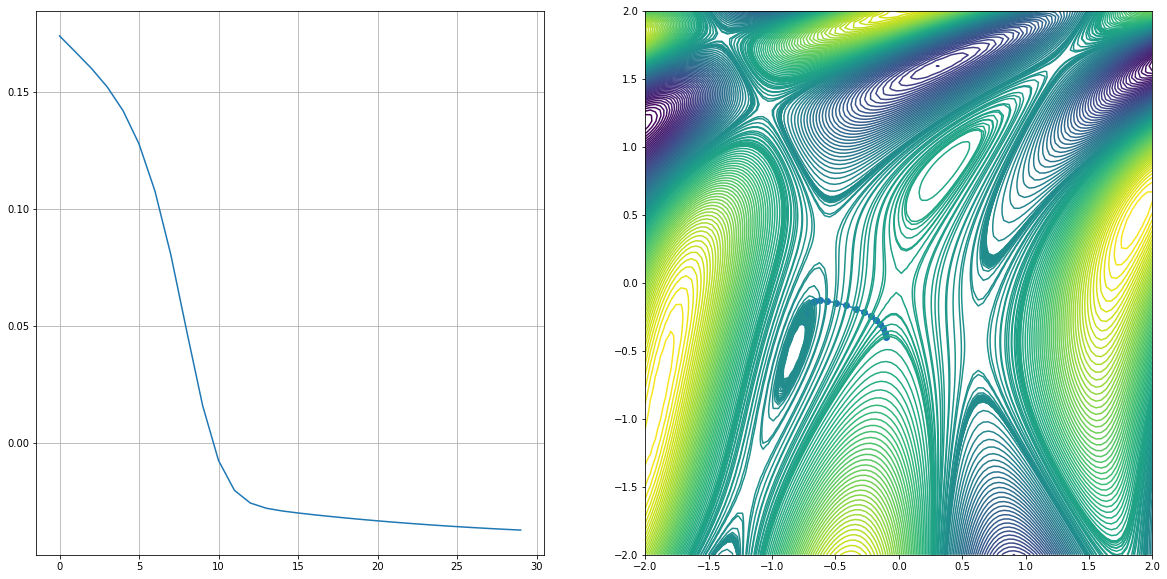

In [20]:
coutners = [0,0]
golden_method(f, -2, 2, 0.2, epoch= 30, x = [-0.1, -0.4])